<a href="https://colab.research.google.com/github/YQ617/code-samples/blob/Data-Analysis-and-Visualization/Yanfei_Qin_Participation_Activity_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Participation Activity 11
### Name: Yanfei Qin
### PennKey: yfqin
### PennID: 51386260

In [ ]:
from google.colab import files
files.upload()

Saving winter_olympics.csv to winter_olympics.csv


{'winter_olympics.csv': b'Year,Sport,Event,Country,Gender,Medal,Age of Athlete\r\n1924,Bobsled,Men\'s Four/Five,Switzerland,Men,gold,\r\n1924,Bobsled,Men\'s Four/Five,Britain,Men,silver,\r\n1924,Bobsled,Men\'s Four/Five,Belgium,Men,bronze,\r\n1924,Cross-Country Skiing,Men\'s 18 Kilometers,Norway,Men,gold,29\r\n1924,Cross-Country Skiing,Men\'s 18 Kilometers,Norway,Men,silver,24\r\n1924,Cross-Country Skiing,Men\'s 18 Kilometers,Finland,Men,bronze,28\r\n1924,Cross-Country Skiing,Men\'s 50 Kilometers,Norway,Men,gold,29\r\n1924,Cross-Country Skiing,Men\'s 50 Kilometers,Norway,Men,silver,27\r\n1924,Cross-Country Skiing,Men\'s 50 Kilometers,Norway,Men,bronze,24\r\n1924,Curling,Men\'s Curling,Britain,Men,gold,\r\n1924,Curling,Men\'s Curling,Sweden,Men,silver,\r\n1924,Curling,Men\'s Curling,France,Men,bronze,\r\n1924,Figure Skating,Men\'s Singles,Sweden,Men,gold,30\r\n1924,Figure Skating,Men\'s Singles,Austria,Men,silver,30\r\n1924,Figure Skating,Men\'s Singles,Switzerland,Men,bronze,19\r\n1924

In [ ]:
import pandas as pd

In [ ]:
winter_olympics = pd.read_csv('winter_olympics.csv')
winter_olympics

,Year,Sport,Event,Country,Gender,Medal,Age of Athlete
0,1924,Bobsled,Men's Four/Five,Switzerland,Men,gold,NaN
1,1924,Bobsled,Men's Four/Five,Britain,Men,silver,NaN
2,1924,Bobsled,Men's Four/Five,Belgium,Men,bronze,NaN
3,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,gold,29.0
4,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,silver,24.0
...,...,...,...,...,...,...,...
2860,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,gold,30.0
2861,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,silver,31.0
2862,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,bronze,27.0
2863,2014,Ice Hockey,Men's Ice Hockey,Canada,Men,gold,NaN


## Activity 1

Choose a country. Using Matplotlib, visualize the all-time count by sport of medals earned by athletes from that country. As an example, the following image uses a horizontal bar chart to visualize the breakdown for Switzerland, specifically. (10 points)
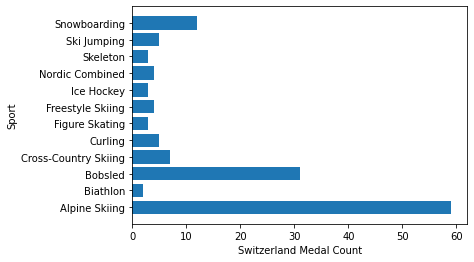

Label your axes appropriately.

In [ ]:
# The country I choose to visualize is China.
China_Medals = pd.DataFrame(winter_olympics.query("Country == 'China'").groupby('Sport')['Medal'].value_counts())
China_Medals = China_Medals.rename(columns={'Medal':'Medal_Counts'})
China_Medals = China_Medals.reset_index()
China_Medals.drop(columns='Medal')
China_Medals_Final = pd.DataFrame(China_Medals.groupby('Sport')['Medal_Counts'].sum())
China_Medals_Final = China_Medals_Final.reset_index()
China_Medals_Final

,Sport,Medal_Counts
0,Curling,1
1,Figure Skating,7
2,Freestyle Skiing,8
3,Short-Track Speedskating,30
4,Speedskating,7


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sport')

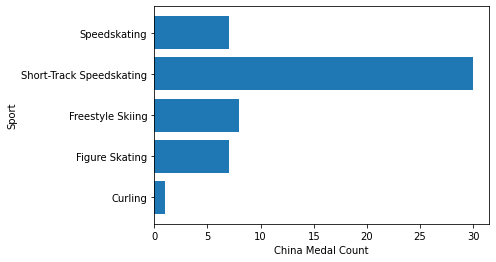

In [ ]:
plt.barh(China_Medals_Final.Sport, China_Medals_Final.Medal_Counts)
plt.xlabel('China Medal Count')
plt.ylabel('Sport')

## Activity 2

Create a grouped or stacked bar chart that distinguishes gold, silver, and bronze medals for the country selected in Activity 1. (10 points)

In [ ]:
China_GSBMedals = pd.DataFrame(winter_olympics.query("Country == 'China'").groupby('Sport')['Medal'].value_counts())
China_GSBMedals = China_GSBMedals.rename(columns={'Medal':'Medal_Counts'})
China_GSBMedals = China_GSBMedals.reset_index()
China_GSBMedals

,Sport,Medal,Medal_Counts
0,Curling,bronze,1
1,Figure Skating,bronze,4
2,Figure Skating,silver,2
3,Figure Skating,gold,1
4,Freestyle Skiing,silver,4
5,Freestyle Skiing,bronze,3
6,Freestyle Skiing,gold,1
7,Short-Track Speedskating,silver,13
8,Short-Track Speedskating,gold,9
9,Short-Track Speedskating,bronze,8


Text(0, 0.5, 'Sport')

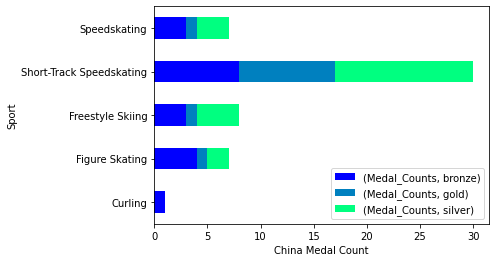

In [ ]:
China_GSBMedals.groupby(['Sport', 'Medal']).sum().unstack().plot(kind='barh', stacked=True, colormap = 'winter')
plt.legend()
plt.xlabel('China Medal Count')
plt.ylabel('Sport')

## Activity 3

Choose any three sports. Using Matplotlib, visualize the count of medals awarded by year for each of those sports. As an example, the following image uses a side-by-side grouped bar chart to count medals for skiing, bobsled, and figure skating. (10 points)
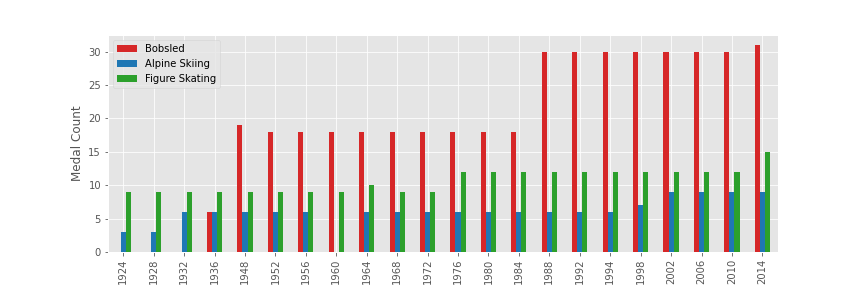

Label your axes appropriately and save the file to a PNG image, then upload that image as part of your submission, along with a link to your notebook or .ipynb file used for generating the figure. Don't worry too much about perfect visuals for this activity - you'll have plenty of time to get better at making your figures look right over time.

In [ ]:
Three_Sports = winter_olympics.query("Sport in ['Short-Track Speedskating','Curling','Freestyle Skiing']")
Three_Sports

,Year,Sport,Event,Country,Gender,Medal,Age of Athlete
9,1924,Curling,Men's Curling,Britain,Men,gold,NaN
10,1924,Curling,Men's Curling,Sweden,Men,silver,NaN
11,1924,Curling,Men's Curling,France,Men,bronze,NaN
1361,1992,Freestyle Skiing,Men's Moguls,France,Men,gold,22.0
1362,1992,Freestyle Skiing,Men's Moguls,France,Men,silver,22.0
...,...,...,...,...,...,...,...
2830,2014,Short-Track Speedskating,Men's 500 Meters,China,Men,silver,19.0
2831,2014,Short-Track Speedskating,Men's 500 Meters,Canada,Men,bronze,22.0
2832,2014,Short-Track Speedskating,"Men's 5,000-Meter Relay",Russia,Men,gold,NaN
2833,2014,Short-Track Speedskating,"Men's 5,000-Meter Relay",United States,Men,silver,NaN


In [ ]:
Three_Sports_Medals = pd.DataFrame(Three_Sports.groupby('Year')['Sport'].value_counts())
Three_Sports_Medals = Three_Sports_Medals.rename(columns={'Sport':'Medal_counts'})
Three_Sports_Medals = Three_Sports_Medals.reset_index()
Three_Sports_Medals

,Year,Sport,Medal_counts
0,1924,Curling,3
1,1992,Short-Track Speedskating,12
2,1992,Freestyle Skiing,6
3,1994,Short-Track Speedskating,18
4,1994,Freestyle Skiing,12
5,1998,Short-Track Speedskating,18
6,1998,Freestyle Skiing,12
7,1998,Curling,6
8,2002,Short-Track Speedskating,24
9,2002,Freestyle Skiing,12


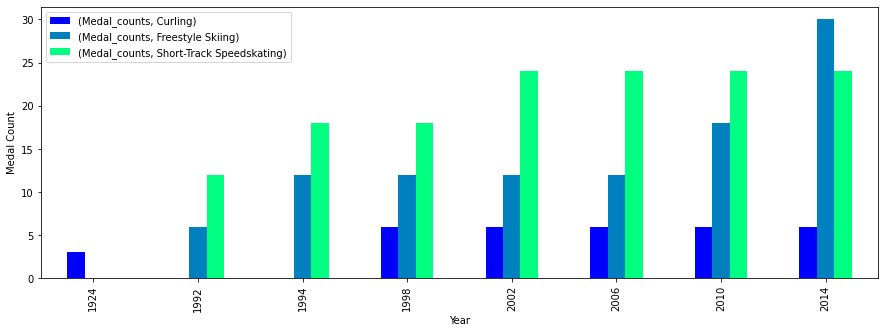

In [ ]:
Three_Sports_Medals.groupby(['Year', 'Sport']).sum().unstack().plot(kind='bar', colormap = 'winter', figsize = (15,5))
plt.xlabel('Year')
plt.ylabel('Medal Count')
plt.legend()
plt.savefig('Three Sports Medal Counts by Year.png')